# Workspace

In [ ]:
#| default_exp workspace

In [ ]:
#| include: false
%load_ext autoreload
%autoreload 2

You are welcome to use this coding environment to train your controller for the project. Follow the instructions below to get started!

## 1. Start the Environment

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [ ]:
#| export
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from feedback_control.simple_pendulum import *
from feedback_control.dc_motor import *

In [ ]:
#| include: false
from IPython.display import Image
from IPython.display import HTML

# To support animations
from matplotlib import animation, rc

In [ ]:
#| hide
# This is equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
rc('font', **{'family' : 'DejaVu Sans', 'weight' : 'normal', 'size'   : 22})

## 2. Simulate an untuned PID controller

In [ ]:
#%%capture
# %matplotlib notebook
pendulum = Pendulum(theta_0=np.radians(0), 
                    theta_dot_0=0, 
                    params=PendulumParameters(b=0.2))

motor = DCMotor(x0=np.array([[0], [0], [0]]), # theta, theta_dot, current
                params=DCMotorParams())

pid = PID(Kp=1000, 
          Kd=0, 
          Ki=0)

# connect the motor to the pendulum (effectively it sets the load on the motor)
motor.connect_to(pendulum)

t0, tf, dt = 0, 10, 1./30 # time
sim = Simulator(pendulum, motor, pid)

sim.y_des(10) # desired final value in degrees
results = sim.run(t0, tf, dt)

# show an animation of the results
ap = AnimateControlledPendulum(sim)
ap.start_animation(t0, tf, dt)

### Plot more information

And we can also dig deeper and verify how the motor is behaving:

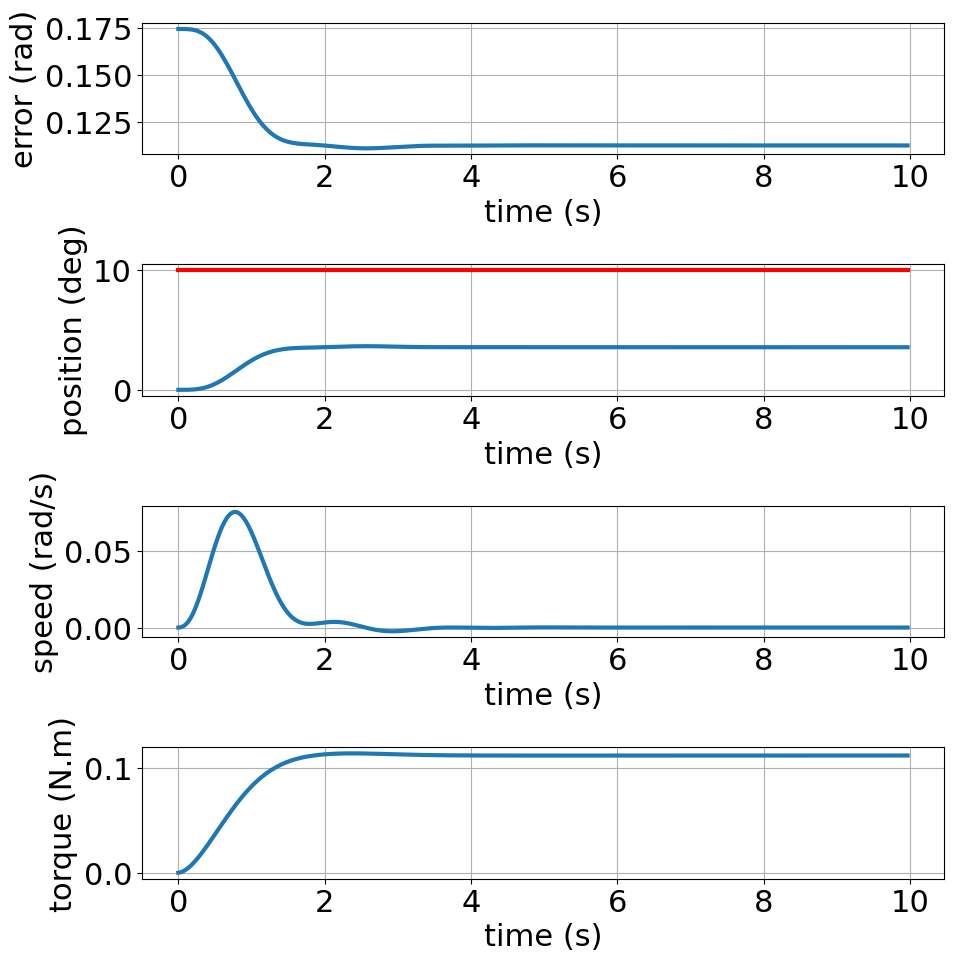

In [ ]:
# %matplotlib inline
fig, axs = plt.subplots(len(results.keys())-1, 1, figsize=(10,10))

for index, key in enumerate(results.keys()):
    if key == 'time (s)': continue
    if key == 'position (rad)':
        axs[index].plot(results['time (s)'], np.degrees(results[key]), linewidth=3)
        axs[index].plot(results['time (s)'], sim.y_des*np.ones(results['time (s)'].shape), color='r', linewidth=3)
        key = 'position (deg)'
    else:
        axs[index].plot(results['time (s)'], results[key], linewidth=3)
    axs[index].set_xlabel('time (s)')
    axs[index].set_ylabel(key)
    axs[index].grid()

plt.tight_layout()

## 3. It's Your Turn!

Now it's your turn to train your own controller to solve the project!  

A few **important notes**:
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will be able to watch the results of using the controller through a simple animation. You will not be able to see how the pendulum reacts to control in real-time as the animation is played after the simulation is finished.
- If you have have a `TypeError: 'Line2D' object is not iterable` error when running the animation, please make sure you have run `%matplotlib notebook`.
